<a href="https://colab.research.google.com/github/topchaebol/006762/blob/master/0705_%EC%BC%80%EB%9D%BC%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리와 MNIST 데이터셋 불러오기

11493376/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, '5')

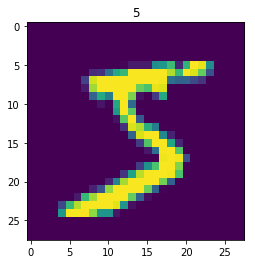

In [4]:
from __future__ import print_function

import keras
from keras.datasets import mnist #데이터셋
from keras.models import Sequential #모델 생성자
from keras.layers import Dense, Dropout #레이어
from keras.optimizers import RMSprop, Adam #최적화 알고리즘

(x_train, y_train), (x_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0]) #이미지 출력
plt.title(y_train[0])

In [5]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test smaples')

# 각 숫자를 원핫 인코딩처럼 변환
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('x_train:', x_train[0])
print('y_train:', y_train[0])


60000 train samples
10000 test smaples
x_train: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.0000

In [14]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) #입력 레이어
model.add(Dense(512, activation='relu'))                    #히든 레이어 
model.add(Dense(num_classes, activation='softmax'))         #출력 레이어
model.summary()

W0705 02:17:46.600522 140604111042432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 02:17:46.649927 140604111042432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 02:17:46.658776 140604111042432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 02:17:46.729505 140604111042432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0705 02:17:46.745250 140604111042432 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy', #오차계산법
              optimizer=RMSprop(lr=0.001),     #최적화 알고리즘
              metrics=['accuracy'])           #모델 평가

batch_size = 128
epochs = 10
model.fit(x_train, y_train,                   #트레이닝 셋
          batch_size = batch_size,            #배치 사이즈
          epochs = epochs,                    #훈련횟수
          verbose =1,                         #출력 상세도 
          validation_data=(x_test, y_test))   #테스트셋
score=model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 157us/step - loss: 2.3016 - acc: 0.1119 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 2/10
60000/60000 [==============================] - 9s 143us/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 3/10
60000/60000 [==============================] - 9s 145us/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 4/10
60000/60000 [==============================] - 9s 142us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 5/10
60000/60000 [==============================] - 9s 143us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 6/10
60000/60000 [==============================] - 9s 142us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 7/10
60000/60000 [==============================] - 9s 142us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - 